In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"


list_evO1O2 = ["150914", "151012", "151226", "170104", "170608", "170729", "170809", "170814", "170818", "170823"]
for event in list_evO1O2:
    print(event)
    filename = f"{base_dir}/GWTC-1/GW{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples



list_evO3a = ["190408_181802", "190412", "190413_134308", "190421_213856", "190503_185404", "190512_180714", "190513_205428", "190517_055101", "190519_153544", "190521", "190521_074359", "190527_092055", "190602_175927", "190620_030421", "190630_185205", "190701_203306", "190706_222641", "190707_093326", "190708_232457", "190720_000836", "190727_060333", "190728_064510", "190803_022701", "190828_063405", "190828_065509", "190910_112807",
                           "190915_235702", "190924_021846", "190925_232845", "190929_012149", "190930_133541", "190413_052954", "190719_215514", "190725_174728", "190731_140936", "190805_211137"]
for event in list(list_evO3a):
    if event != '190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/GW{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples


list_evO3b = ["191105_143521", "191109_010717", "191127_050227", "191129_134029", "191204_171526", "191215_223052", "191216_213338", "191222_033537", "191230_180458", "200112_155838", "200128_022011", "200129_065458", "200202_154313", "200208_130117",
              "200209_085452", "200219_094415", "200224_222234", "200225_060421", "200302_015811", "200311_115853", "200316_215756", "191103_012549", "200216_220804"]
for event in list(list_evO3b):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-GW{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")



150914
Using Overall_posterior posterior with a total of 8350 samples
151012
Using Overall_posterior posterior with a total of 16096 samples
151226
Using Overall_posterior posterior with a total of 52252 samples
170104
Using Overall_posterior posterior with a total of 24972 samples
170608
Using Overall_posterior posterior with a total of 6448 samples
170729
Using Overall_posterior posterior with a total of 5112 samples
170809
Using Overall_posterior posterior with a total of 14802 samples
170814
Using Overall_posterior posterior with a total of 40000 samples
170818
Using Overall_posterior posterior with a total of 5862 samples
170823
Using Overall_posterior posterior with a total of 4278 samples
190408_181802
Using PublicationSamples posterior with a total of 37366 samples
190412
Using PublicationSamples posterior with a total of 23984 samples
190413_134308
Using PublicationSamples posterior with a total of 38056 samples
190421_213856
Using PublicationSamples posterior with a total of 

In [3]:
# # Read the posterior samples
# posterior_dict = {}
# base_dir = "/home/czc/projects/working/LIGO_posterior"

# list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO1O2.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
#     pos_samples = posterior_samples(filename)
#     posterior_dict[event] = pos_samples

# list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3a.keys()):
#     if event != 'GW190814':
#         print(event)
#         filename = f"{base_dir}/GWTC-2/{event}.h5"
#         pos_samples = posterior_samples(filename)
#         posterior_dict[event] = pos_samples

# list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
#     runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
# for event in list(list_evO3b.keys()):
#     print(event)
#     filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
#     pos_samples = posterior_samples(filename, waveform='C01:Mixed')
#     posterior_dict[event] = pos_samples

# print(f"Using {len(posterior_dict)} events.")

In [4]:
population_model = "PBH-CC-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_4/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [5]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict


{'α': Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None),
 'Mf': Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

15:15 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-CC-1st_flatLCDM_4/'
15:15 bilby INFO    : Search parameters:
15:15 bilby INFO    :   α = Uniform(minimum=0.0, maximum=5.0, name='$\\alpha$', latex_label='$\\alpha$', unit=None, boundary=None)
15:15 bilby INFO    :   Mf = Uniform(minimum=1.0, maximum=50.0, name='$M_f$', latex_label='$M_f$', unit=None, boundary=None)
15:15 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}fpbh$', latex_label='$\\log_{10}fpbh$', unit=None, boundary=None)
15:15 bilby INFO    :   H0 = 67.4
15:15 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:122: RuntimeWarning: divide by zero encountered in log
15:16 bilby INFO    : Single likelihood evaluation took 2.330e-01 s


0it [00:00, ?it/s]

15:16 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f05a08ca700>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
15:16 bilby INFO    : Checkpoint every check_point_delta_t = 60s
15:16 bilby INFO    : Using dynesty version 1.0.1
15:16 bilby INFO    : Using the bilby-implemented rwalk sampl

1051it [05:15,  3.93it/s, bound:0 nc: 16 ncall:4.5e+03 eff:23.3% logz=-1933.38+/-0.15 dlogz:178.441>0.1]  

15:21 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1345it [06:28,  2.97it/s, bound:0 nc: 23 ncall:8.5e+03 eff:15.8% logz=-1887.48+/-0.16 dlogz:131.906>0.1]

15:22 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1559it [07:42,  1.79it/s, bound:0 nc: 81 ncall:1.3e+04 eff:12.3% logz=-1860.57+/-0.16 dlogz:104.556>0.1]

15:24 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1712it [08:55,  1.84it/s, bound:0 nc: 95 ncall:1.7e+04 eff:10.2% logz=-1845.75+/-0.16 dlogz:89.400>0.1] 

15:25 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1798it [09:56,  1.45it/s, bound:7 nc: 70 ncall:2.0e+04 eff:9.1% logz=-1837.40+/-0.16 dlogz:80.881>0.1] 

15:26 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1923it [10:58,  1.92it/s, bound:21 nc: 35 ncall:2.4e+04 eff:8.0% logz=-1827.22+/-0.16 dlogz:70.482>0.1]

15:27 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2042it [12:04,  1.79it/s, bound:35 nc: 32 ncall:2.8e+04 eff:7.2% logz=-1817.42+/-0.16 dlogz:61.028>0.1]

15:28 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2159it [13:13,  1.69it/s, bound:48 nc: 38 ncall:3.3e+04 eff:6.6% logz=-1808.27+/-0.16 dlogz:51.617>0.1]

15:29 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2279it [14:18,  1.83it/s, bound:62 nc: 73 ncall:3.7e+04 eff:6.1% logz=-1800.27+/-0.17 dlogz:44.430>0.1]

15:30 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2386it [15:22,  1.73it/s, bound:74 nc: 31 ncall:4.1e+04 eff:5.8% logz=-1794.73+/-0.17 dlogz:38.654>0.1]

15:31 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2500it [16:31,  1.67it/s, bound:88 nc: 38 ncall:4.6e+04 eff:5.5% logz=-1790.04+/-0.17 dlogz:33.729>0.1]

15:32 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2619it [17:41,  1.65it/s, bound:101 nc: 38 ncall:5.0e+04 eff:5.2% logz=-1785.21+/-0.17 dlogz:28.650>0.1]

15:33 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2709it [18:42,  1.50it/s, bound:112 nc: 39 ncall:5.3e+04 eff:5.1% logz=-1782.23+/-0.17 dlogz:25.500>0.1]

15:35 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2833it [20:00,  1.59it/s, bound:126 nc: 37 ncall:5.8e+04 eff:4.9% logz=-1778.61+/-0.17 dlogz:21.616>0.1]

15:36 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2954it [21:21,  1.49it/s, bound:140 nc: 32 ncall:6.2e+04 eff:4.7% logz=-1776.22+/-0.17 dlogz:18.994>0.1]

15:37 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3045it [22:22,  1.47it/s, bound:150 nc: 33 ncall:6.6e+04 eff:4.6% logz=-1774.26+/-0.17 dlogz:16.839>0.1]

15:38 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3134it [23:25,  1.42it/s, bound:161 nc: 36 ncall:6.9e+04 eff:4.5% logz=-1772.56+/-0.17 dlogz:14.959>0.1]

15:39 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3221it [24:27,  1.39it/s, bound:172 nc: 34 ncall:7.3e+04 eff:4.4% logz=-1771.01+/-0.17 dlogz:13.235>0.1]

15:40 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3312it [25:31,  1.42it/s, bound:183 nc: 39 ncall:7.6e+04 eff:4.3% logz=-1769.72+/-0.17 dlogz:11.759>0.1]

15:41 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3405it [26:38,  1.36it/s, bound:194 nc: 37 ncall:8.0e+04 eff:4.3% logz=-1768.54+/-0.17 dlogz:10.391>0.1]

15:42 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3499it [27:42,  1.41it/s, bound:205 nc: 39 ncall:8.3e+04 eff:4.2% logz=-1767.56+/-0.17 dlogz:9.267>0.1] 

15:44 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3591it [28:48,  1.40it/s, bound:216 nc: 39 ncall:8.7e+04 eff:4.1% logz=-1766.66+/-0.17 dlogz:8.530>0.1]

15:45 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3685it [29:54,  1.41it/s, bound:227 nc: 38 ncall:9.0e+04 eff:4.1% logz=-1765.77+/-0.18 dlogz:7.453>0.1]

15:46 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3777it [31:01,  1.38it/s, bound:239 nc: 39 ncall:9.4e+04 eff:4.0% logz=-1765.06+/-0.18 dlogz:6.564>0.1]

15:47 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3869it [32:10,  1.33it/s, bound:251 nc: 78 ncall:9.8e+04 eff:4.0% logz=-1764.42+/-0.18 dlogz:5.742>0.1]

15:48 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3963it [33:20,  1.31it/s, bound:263 nc: 38 ncall:1.0e+05 eff:3.9% logz=-1763.87+/-0.18 dlogz:5.002>0.1]

15:49 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4056it [34:29,  1.34it/s, bound:275 nc: 40 ncall:1.1e+05 eff:3.9% logz=-1763.40+/-0.18 dlogz:4.350>0.1]

15:50 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:50 bilby INFO    : Writing 105 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4150it [35:36,  1.38it/s, bound:287 nc: 39 ncall:1.1e+05 eff:3.8% logz=-1762.99+/-0.18 dlogz:3.760>0.1]

15:51 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4243it [36:43,  1.34it/s, bound:299 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1762.66+/-0.18 dlogz:3.259>0.1]

15:53 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:53 bilby INFO    : Writing 151 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4336it [37:50,  1.40it/s, bound:310 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1762.37+/-0.18 dlogz:2.810>0.1]

15:54 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:54 bilby INFO    : Writing 184 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4430it [38:58,  1.40it/s, bound:322 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1762.12+/-0.18 dlogz:2.404>0.1]

15:55 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:55 bilby INFO    : Writing 205 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4523it [40:04,  1.37it/s, bound:334 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1761.91+/-0.18 dlogz:2.050>0.1]

15:56 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:56 bilby INFO    : Writing 247 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4617it [41:11,  1.35it/s, bound:346 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1761.72+/-0.18 dlogz:1.735>0.1]

15:57 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:57 bilby INFO    : Writing 338 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4711it [42:17,  1.39it/s, bound:358 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1761.57+/-0.18 dlogz:1.463>0.1]

15:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:58 bilby INFO    : Writing 376 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4806it [43:23,  1.41it/s, bound:370 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1761.44+/-0.18 dlogz:1.224>0.1]

15:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
15:59 bilby INFO    : Writing 412 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4897it [44:30,  1.35it/s, bound:382 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1761.33+/-0.18 dlogz:1.027>0.1]

16:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:00 bilby INFO    : Writing 546 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4991it [45:36,  1.42it/s, bound:394 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1761.23+/-0.18 dlogz:0.881>0.1]

16:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:01 bilby INFO    : Writing 622 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5083it [46:42,  1.39it/s, bound:406 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.15+/-0.18 dlogz:0.736>0.1]

16:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:03 bilby INFO    : Writing 779 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5174it [47:48,  1.34it/s, bound:418 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1761.08+/-0.18 dlogz:0.614>0.1]

16:04 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:04 bilby INFO    : Writing 918 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5267it [48:54,  1.39it/s, bound:430 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1761.02+/-0.18 dlogz:0.507>0.1]

16:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:05 bilby INFO    : Writing 1080 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5353it [49:59,  1.31it/s, bound:442 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1760.96+/-0.18 dlogz:0.425>0.1]

16:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:06 bilby INFO    : Writing 1373 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5442it [51:05,  1.32it/s, bound:454 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1760.92+/-0.18 dlogz:0.353>0.1]

16:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:07 bilby INFO    : Writing 1543 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5530it [52:12,  1.33it/s, bound:465 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1760.88+/-0.18 dlogz:0.294>0.1]

16:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:08 bilby INFO    : Writing 1651 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5623it [53:18,  1.40it/s, bound:477 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1760.85+/-0.18 dlogz:0.242>0.1]

16:09 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:09 bilby INFO    : Writing 1573 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5719it [54:24,  1.41it/s, bound:489 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1760.82+/-0.18 dlogz:0.198>0.1]

16:10 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:10 bilby INFO    : Writing 1636 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5809it [55:31,  1.38it/s, bound:501 nc: 40 ncall:1.8e+05 eff:3.3% logz=-1760.79+/-0.18 dlogz:0.165>0.1]

16:11 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:11 bilby INFO    : Writing 1600 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5901it [56:37,  1.37it/s, bound:513 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1760.77+/-0.18 dlogz:0.136>0.1]

16:12 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:12 bilby INFO    : Writing 1616 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5993it [57:43,  1.38it/s, bound:525 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1760.75+/-0.18 dlogz:0.113>0.1]

16:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:14 bilby INFO    : Writing 1647 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6024it [58:07,  1.23it/s, bound:529 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1760.75+/-0.18 dlogz:0.106>0.1]

16:14 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_resume.pickle
16:14 bilby INFO    : Writing 1600 current samples to H0_GWTC-3_PBH-CC-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
16:14 bilby INFO    : Starting to close worker pool.
16:14 bilby INFO    : Finished closing worker pool.


6051it [58:10,  1.73it/s, bound:532 nc:  1 ncall:1.9e+05 eff:3.5% logz=-1760.66+/-0.18 dlogz:0.000>0.1]

16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.


16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
16:14 bilby WARNING : Multiple likelihood matches found between 

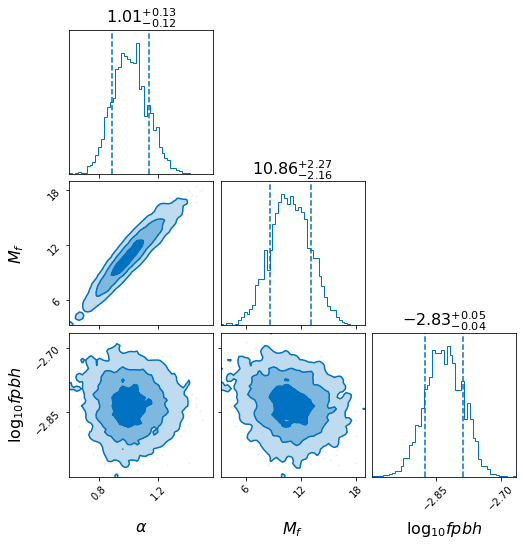

In [6]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
